In [ ]:
#Importing the Basic mandatory Libraries and other libs as per requirment
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from numpy import math 
from sklearn.metrics import mean_squared_error

In [ ]:
#Loading the file
df = pd.read_csv("/content/auto-mpg.csv")

In [ ]:
df.shape

(398, 9)

In [ ]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [ ]:
df.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
115,15.0,8,350.0,145,4082,13.0,73,1,chevrolet monte carlo s
55,27.0,4,97.0,60,1834,19.0,71,2,volkswagen model 111
361,25.4,6,168.0,116,2900,12.6,81,3,toyota cressida
164,21.0,6,231.0,110,3039,15.0,75,1,buick skyhawk
332,29.8,4,89.0,62,1845,15.3,80,2,vokswagen rabbit


In [ ]:
#dropping Car name since it is an unrelated feature for predicting mpg
df = df.drop('car name', axis = 1)

In [ ]:
#Calculating the 'no of years' from Yr(Model Yr) Feature
df['No of yrs']= 90-df['yr']
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,No of yrs
0,18.0,8,307.0,130,3504,12.0,70,1,20
1,15.0,8,350.0,165,3693,11.5,70,1,20
2,18.0,8,318.0,150,3436,11.0,70,1,20
3,16.0,8,304.0,150,3433,12.0,70,1,20
4,17.0,8,302.0,140,3449,10.5,70,1,20
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,8
394,44.0,4,97.0,52,2130,24.6,82,2,8
395,32.0,4,135.0,84,2295,11.6,82,1,8
396,28.0,4,120.0,79,2625,18.6,82,1,8


In [ ]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin,No of yrs
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,13.989950
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,8.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,11.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,14.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,17.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,20.000000


In [ ]:
df.describe(include= "all")

,mpg,cyl,disp,hp,wt,acc,yr,origin,No of yrs
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,13.989950
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,3.697627
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,8.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,11.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,14.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,17.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mpg        398 non-null    float64
 1   cyl        398 non-null    int64  
 2   disp       398 non-null    float64
 3   hp         398 non-null    object 
 4   wt         398 non-null    int64  
 5   acc        398 non-null    float64
 6   yr         398 non-null    int64  
 7   origin     398 non-null    int64  
 8   No of yrs  398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [ ]:
df.dtypes

mpg          float64
cyl            int64
disp         float64
hp            object
wt             int64
acc          float64
yr             int64
origin         int64
No of yrs      int64
dtype: object

In [ ]:
hpisdigit= pd.DataFrame(df.hp.str.isdigit())
df[hpisdigit['hp']== False]  #From temp take only those rows where hp false

,mpg,cyl,disp,hp,wt,acc,yr,origin,No of yrs
32,25.0,4,98.0,?,2046,19.0,71,1,19
126,21.0,6,200.0,?,2875,17.0,74,1,16
330,40.9,4,85.0,?,1835,17.3,80,2,10
336,23.6,4,140.0,?,2905,14.3,80,1,10
354,34.5,4,100.0,?,2320,15.8,81,2,9
374,23.0,4,151.0,?,3035,20.5,82,1,8


In [ ]:
#Replacing ? with Nan Values 
df = df.replace('?',np.nan)
df[hpisdigit['hp']== False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,No of yrs
32,25.0,4,98.0,NaN,2046,19.0,71,1,19
126,21.0,6,200.0,NaN,2875,17.0,74,1,16
330,40.9,4,85.0,NaN,1835,17.3,80,2,10
336,23.6,4,140.0,NaN,2905,14.3,80,1,10
354,34.5,4,100.0,NaN,2320,15.8,81,2,9
374,23.0,4,151.0,NaN,3035,20.5,82,1,8


In [ ]:
df.median()

mpg            23.0
cyl             4.0
disp          148.5
hp             93.5
wt           2803.5
acc            15.5
yr             76.0
origin          1.0
No of yrs      14.0
dtype: float64

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


mpg            23.514573
cyl             5.454774
disp          193.425879
wt           2970.424623
acc            15.568090
yr             76.010050
origin          1.572864
No of yrs      13.989950
dtype: float64

In [ ]:


medianFiller = lambda x : x.fillna(x.median())  #Replacing the missing value with median
df = df.apply(medianFiller, axis =1)
df['hp']= df['hp'].astype('float64')
df[hpisdigit['hp']== False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,No of yrs
32,25.0,4.0,98.0,22.00,2046.0,19.0,71.0,1.0,19.0
126,21.0,6.0,200.0,19.00,2875.0,17.0,74.0,1.0,16.0
330,40.9,4.0,85.0,29.10,1835.0,17.3,80.0,2.0,10.0
336,23.6,4.0,140.0,18.95,2905.0,14.3,80.0,1.0,10.0
354,34.5,4.0,100.0,25.15,2320.0,15.8,81.0,2.0,9.0
374,23.0,4.0,151.0,21.75,3035.0,20.5,82.0,1.0,8.0


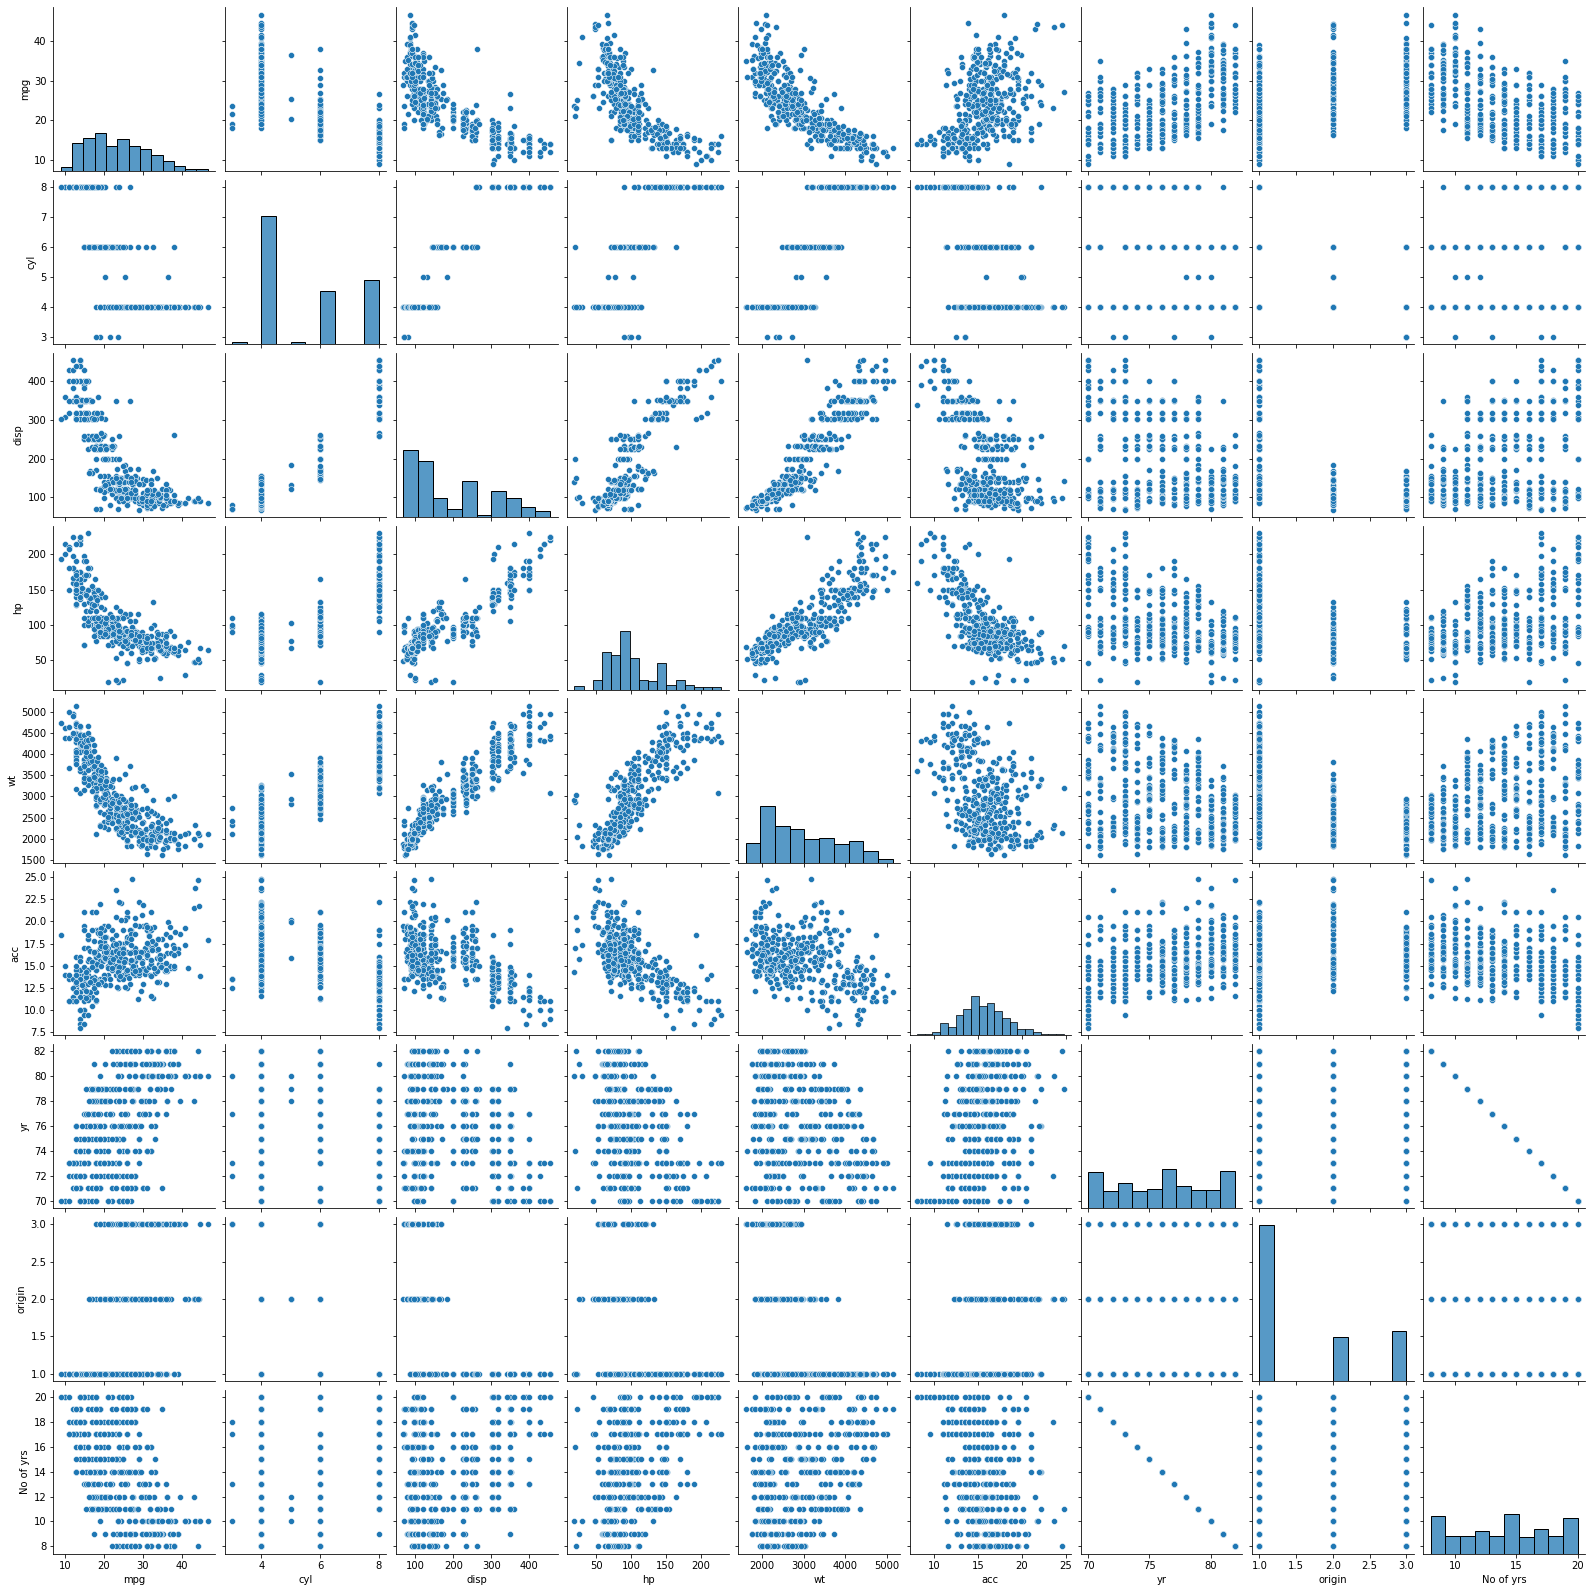

In [ ]:
#pairplot of each feature with every variable. 
sb.pairplot(df)

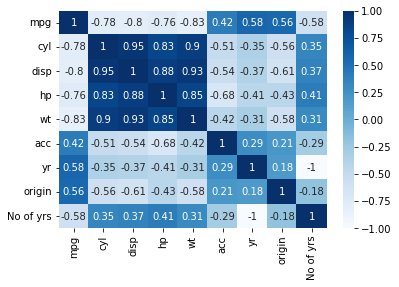

In [ ]:
#Finding the coorelation of the different features with each other.
sb.heatmap(df[['mpg','cyl','disp','hp','wt','acc','yr','origin','No of yrs']].corr(),
           cmap = 'Blues', annot=True)



In [ ]:
#dropping the year column, since we have "No of yrs" Columns
df = df.drop(['yr'], axis = 1)

In [ ]:
#Building Linear regression model

#Independent variables
x = df.drop(['mpg'],axis=1)
#dependent variable 
df
y = df['mpg']
x.head()

,cyl,disp,hp,wt,acc,origin,No of yrs
0,8.0,307.0,130.0,3504.0,12.0,1.0,20.0
1,8.0,350.0,165.0,3693.0,11.5,1.0,20.0
2,8.0,318.0,150.0,3436.0,11.0,1.0,20.0
3,8.0,304.0,150.0,3433.0,12.0,1.0,20.0
4,8.0,302.0,140.0,3449.0,10.5,1.0,20.0


In [ ]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
#Splitting x and y into training and testing in a ratio of 70:30
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 1)


In [ ]:
#Fit Model 
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg_model.coef_

array([-0.39176136,  0.02230986, -0.01215141, -0.00723144,  0.09296882,
        1.19018499, -0.79715511])

In [ ]:
reg_model.intercept_

52.00183467656032

In [ ]:
#accuracy of the training set
accuracy_train= reg_model.score(x_train,y_train)
accuracy_train

0.8076563336423458

In [ ]:
#Testing set Accuracy
accuracy_test= reg_model.score(x_test,y_test)
accuracy_test

0.8490952870903421

In [ ]:
#Predicted values of the model (mpg)
y_pred = reg_model.predict(x_test)
y_pred

array([21.28985798, 26.35335656, 20.10316932, 25.54176465, 24.23639017,
       15.71487298, 28.49696907, 34.84704889, 16.86309083, 10.75535521,
       30.46696356, 16.56558611, 22.31798705, 26.20324001, 36.76864291,
       22.4179473 , 10.81778885, 20.45199982,  8.93029816, 33.52062892,
       26.70066165, 30.98744533, 21.10721994, 25.89921212, 26.08124697,
       28.71965311, 32.89705176, 32.99696729, 15.18614641, 30.26491977,
       27.39374086, 10.92122677, 20.35681285, 29.08229344, 25.23478076,
       13.74794086, 27.02986062,  9.14301342, 31.72113171, 24.28066909,
       24.68571131, 24.85015552, 20.76794034, 32.56739991, 26.20935125,
       22.17991333, 21.14064707, 11.72106068, 29.08876516, 19.06958961,
       25.10205701, 26.9485849 , 16.73639454, 12.0749563 , 28.91272522,
       25.73761626, 10.27197355, 13.03071499, 31.08081828, 36.02891067,
       34.98542292, 36.09398885, 17.8415921 , 27.65574191, 20.21478573,
       31.96890355, 26.81990223, 26.52126692, 29.89501817, 12.48

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
rmse

2.9703429173942264

In [ ]:
def f_rmse(y_test, y_pred):
  loss = np.sqrt(np.mean(np.square(((y_test-y_pred)/y_test*100)),axis = 0))
  print(loss)
f_rmse(y_test,y_pred)

14.180295653460487


In [ ]:
#Using polynomial features of degree 2 to improve the accuracy of the model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree = 2, interaction_only= 1)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2, y_train)
y_pred = poly_clf.predict(x_test2)
#print y pred
#in sample (training) R^2 will improve with no of variables
print(poly_clf.score(x_train2, y_train))

0.8892410795298988


In [ ]:
#out off sample (testing) R^2 is our MOS and does improve
print(poly_clf.score(x_test2, y_test))

0.8668174851465348
